In [8]:
import os
import sqlite3
import pandas as pd
import numpy as np
from tensorflow.keras.models import load_model

In [2]:
import sys
sys.path.append('../')
import nn_train.tools as tools
from nn_train.tools import pa_fields, seven_fields, fields
from nn_train.neural_network import NeuralNetwork

In [3]:
databases = [dir_path for dir_path in os.walk('..') if 'other.db' in dir_path[2]][0]
databases

('../Data/databases',
 [],
 ['Aleksashina_Керов_Андрей.db', 'clear_emotions.db', 'other.db'])

In [4]:
df = pd.DataFrame()

In [5]:
data_dir = databases[0]
for db_file in databases[2]:
    if db_file in ['clear_emotions.db', 'model_metrics.db']:
        continue
    db_path = os.path.join(data_dir, db_file)
    name_db = db_file[:-3]
    connection = sqlite3.connect(db_path)
    df_2 = pd.read_sql(f'select * from {name_db}', con=connection)
    df = pd.concat([df, df_2], axis=0)

In [15]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [16]:
tools.make_valid_df(df, fields)

In [17]:
df

,Index_,Video_Time,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,...,Action_Unit_12___Right___Lip_Corner_Puller,Action_Unit_14___Right___Dimpler,Action_Unit_15___Right___Lip_Corner_Depressor,Action_Unit_20___Right___Lip_Stretcher,Action_Unit_43___Right___Eyes_Closed,Stimulus,Event_Marker,UNKNOWN,Participant_Name,Analysis_Index
Index_,,,,,,,,,,,,,,,,,,,,,
00:00:00.000_Керов Андрей_3,00:00:00.000_Керов Андрей_3,00:00:00.000,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.030_Керов Андрей_3,00:00:00.030_Керов Андрей_3,00:00:00.030,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.060_Керов Андрей_3,00:00:00.060_Керов Андрей_3,00:00:00.060,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.090_Керов Андрей_3,00:00:00.090_Керов Андрей_3,00:00:00.090,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
00:00:00.121_Керов Андрей_3,00:00:00.121_Керов Андрей_3,00:00:00.121,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Керов Андрей,Analysis 3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,00:01:51.700_Куликов Алексей_1,00:01:51.700,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.800_Куликов Алексей_1,00:01:51.800_Куликов Алексей_1,00:01:51.800,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1
00:01:51.900_Куликов Алексей_1,00:01:51.900_Куликов Алексей_1,00:01:51.900,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,...,0.0,0.0,0.0,0.0,0.0,No Stimulus,No Event Marker,UNKNOWN,Куликов Алексей,Analysis 1


In [18]:
# df_train_, df_other = tools.groupby(df, other=True)
# df_train_

In [19]:
name_db = 'clear_emotions'
db_path = os.path.join(databases[0], f'{name_db}.db')
db_path

'../Data/databases/clear_emotions.db'

In [20]:
connection = sqlite3.connect(db_path)
df_clear = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear

,Index_,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
0,00:00:01.300_Смолин Александр_1,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
1,00:00:07.575_Керов Андрей_8,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
2,00:00:03.000_Боим_9,0.97,0.01,0.0,0.0,0.04,0.0,0.0,0.01,0.31
3,00:00:05.700_Provotorov_3,0.97,0.0,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
4,00:00:09.848_Korsakov_9,0.97,0.0,0.0,0.01,0.01,0.0,0.01,-0.01,0.3
...,...,...,...,...,...,...,...,...,...,...
525,00:00:07.700_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
526,00:00:08.200_Nasyrov_7,0.01,0.0,0.0,0.01,0.0,0.0,0.99,-0.99,0.63
527,00:00:07.300_Nasyrov_7,0.01,0.0,0.0,0.0,0.0,0.0,0.99,-0.99,0.62
528,00:00:08.900_Nasyrov_7,0.0,0.0,0.0,0.01,0.0,0.0,1.0,-1.0,0.63


In [21]:
tools.make_valid_df(df_clear, fields)

In [22]:
df_clear = df_clear[fields]

In [23]:
df_clear

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:01.300_Смолин Александр_1,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:07.575_Керов Андрей_8,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:03.000_Боим_9,0.97,0.01,0.00,0.00,0.04,0.0,0.00,0.01,0.31
00:00:05.700_Provotorov_3,0.97,0.00,0.02,0.03,0.01,0.0,0.01,-0.03,0.23
00:00:09.848_Korsakov_9,0.97,0.00,0.00,0.01,0.01,0.0,0.01,-0.01,0.30
...,...,...,...,...,...,...,...,...,...
00:00:07.700_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:08.200_Nasyrov_7,0.01,0.00,0.00,0.01,0.00,0.0,0.99,-0.99,0.63
00:00:07.300_Nasyrov_7,0.01,0.00,0.00,0.00,0.00,0.0,0.99,-0.99,0.62


In [24]:
nn = NeuralNetwork(df[pa_fields], df[seven_fields])

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


In [25]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [26]:
models = []

In [27]:
# def removeprefix(text, prefix):
#     if text.startswith(prefix):
#         return text[len(prefix):]
#     return text

In [28]:
# removeprefix('model_third_6.7.5_2', 'model_third_')

In [29]:
# removeprefix('7.2.7_3', 'model_third_')

In [30]:
# '7.2.7_3'.split('_')

In [31]:
# '7.2.7'.split('_')

### Загрузка всех 288 моделей

In [43]:
# v = 1
# layer = 'third'
# dir_path = f'../saved_models/{layer}/_{v}'
# models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
# models

['model_third_6.8.5',
 'model_third_9.8.5',
 'model_third_8.2.3',
 'model_third_7.9.9',
 'model_third_9.10.5',
 'model_third_9.7.7',
 'model_third_9.10.3',
 'model_third_8.8.5',
 'model_third_8.3.3',
 'model_third_7.6.3',
 'model_third_9.2.6',
 'model_third_9.3.6',
 'model_third_7.6.8',
 'model_third_6.10.7',
 'model_third_9.2.3',
 'model_third_9.6.9',
 'model_third_7.7.6',
 'model_third_9.7.3',
 'model_third_9.3.4',
 'model_third_8.9.8',
 'model_third_9.4.6',
 'model_third_9.2.4',
 'model_third_6.10.9',
 'model_third_9.3.5',
 'model_third_7.3.5',
 'model_third_6.6.7',
 'model_third_7.8.7',
 'model_third_7.10.6',
 'model_third_7.8.3',
 'model_third_9.5.4',
 'model_third_6.8.8',
 'model_third_9.5.9',
 'model_third_7.3.6',
 'model_third_9.2.7',
 'model_third_7.2.8',
 'model_third_9.2.9',
 'model_third_9.6.2',
 'model_third_7.2.2',
 'model_third_9.3.9',
 'model_third_8.4.5',
 'model_third_7.10.8',
 'model_third_7.2.6',
 'model_third_7.3.7',
 'model_third_8.8.4',
 'model_third_7.9.3',
 'mo

In [ ]:
# for i in range(len(models)):
#     model_layers_v = removeprefix(models[i], 'model_third_')
#     N = model_layers_v.split('_')[0]
#     path = os.path.join(dir_path, models[i])
#     model = load_model(path)
#     nn = NeuralNetwork(df[pa_fields], df[seven_fields], )
#     models[i] = [model_name, N, nn]

In [78]:
# def load_models(path_to_saved_models, df, layer='first', v=1):
#     dir_path = os.path.join(path_to_saved_models, layer, f'_{v}')
#     models = [el for el in list(os.walk('..')) if dir_path in el[0]][0][1]
#     for i in range(len(models)):
#         model_layers_v = removeprefix(models[i], f'model_{layer}_')
#         N = model_layers_v.split('_')[0]
#         path = os.path.join(dir_path, models[i])
#         model = load_model(path)
#         nn = NeuralNetwork(df[pa_fields], df[seven_fields], model)
#         models[i] = [model_layers_v, N, nn]
    
#     models.sort(key=lambda x: list(map(int, x[1].split('.'))))
    
#     return models

In [32]:
v = 1
layer = 'first'
models = tools.load_models('../saved_models', df, layer, v)
models

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['0', '0', <nn_train.neural_network.NeuralNetwork at 0x7f6ad204a6d0>],
 ['2', '2', <nn_train.neural_network.NeuralNetwork at 0x7f6acb5d1280>],
 ['3', '3', <nn_train.neural_network.NeuralNetwork at 0x7f6acb596190>],
 ['4', '4', <nn_train.neural_network.NeuralNetwork at 0x7f6acb4a80a0>],
 ['5', '5', <nn_train.neural_network.NeuralNetwork at 0x7f6ad1e9abb0>],
 ['6', '6', <nn_train.neural_network.NeuralNetwork at 0x7f6acb70e220>],
 ['7', '7', <nn_train.neural_network.NeuralNetwork at 0x7f6ad1eb5460>],
 ['8', '8', <nn_train.neural_network.NeuralNetwork at 0x7f6acb5207f0>],
 ['9', '9', <nn_train.neural_network.NeuralNetwork at 0x7f6acb3cc310>]]

In [33]:
len(models)

9

In [ ]:
# v = 1
# i = 0
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

In [2]:
# v = 5
# i = 0
# seven_models_ = ['7.9.8', '7.10.9', '8.9.8', '8.10.8', '8.10.9', '9.6.7', '9.6.8']
# dir_path = f'../saved_models/third/_{v}'
# path = os.path.join(dir_path, seven_models_[i] + f'_{v}')
# model = load_model(path)
# print(seven_models_[i])

7.9.8


In [34]:
df_metrics = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics

,model,layer,N,mean,norm,stat


In [35]:
metrics = tools.metrics

In [43]:
# def create_df_metrics(models, test, df_metrics, layer='first'):
#     for model_list in models:
#         entry_dict = {'model': model_list[0], 'layer': layer, 'N': model_list[1]}
#         entry_dict.update({metric: model_list[2].model_metric(test, metric) for metric in metrics})
#         df_metrics = df_metrics.append(entry_dict, ignore_index = True)
#     return df_metrics

In [36]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [37]:
layer

'first'

In [23]:
models

[['2.2_1', '2.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c90589370>],
 ['2.3_1', '2.3', <nn_train.neural_network.NeuralNetwork at 0x7f6ca6155fd0>],
 ['2.4_1', '2.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c597b5e80>],
 ['2.5_1', '2.5', <nn_train.neural_network.NeuralNetwork at 0x7f6ca5fe3ca0>],
 ['2.6_1', '2.6', <nn_train.neural_network.NeuralNetwork at 0x7f6c9c6e2be0>],
 ['2.7_1', '2.7', <nn_train.neural_network.NeuralNetwork at 0x7f6c5b7f8b50>],
 ['2.8_1', '2.8', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bdebc70>],
 ['2.9_1', '2.9', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bbb3d30>],
 ['3.2_1', '3.2', <nn_train.neural_network.NeuralNetwork at 0x7f6c5a83ad00>],
 ['3.3_1', '3.3', <nn_train.neural_network.NeuralNetwork at 0x7f6c5ad9ce50>],
 ['3.4_1', '3.4', <nn_train.neural_network.NeuralNetwork at 0x7f6c9044de50>],
 ['3.5_1', '3.5', <nn_train.neural_network.NeuralNetwork at 0x7f6c5bf97c70>],
 ['3.6_1', '3.6', <nn_train.neural_network.NeuralNetwork at 0x7f

In [38]:
df_metrics = tools.create_df_metrics(models, test, df_metrics, layer=layer)
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [39]:
df_metrics.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
8,9,first,9,0.054908,0.153257,0.499960
7,8,first,8,0.056650,0.156193,0.494598
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
6,7,first,7,0.062854,0.170156,0.491686
2,3,first,3,0.063164,0.173305,0.482356
1,2,first,2,0.064459,0.177864,0.475085
5,6,first,6,0.064500,0.174563,0.490673
0,0,first,0,0.084346,0.230381,0.495604


In [40]:
df_metrics

,model,layer,N,mean,norm,stat
0,0,first,0,0.084346,0.230381,0.495604
1,2,first,2,0.064459,0.177864,0.475085
2,3,first,3,0.063164,0.173305,0.482356
3,4,first,4,0.059134,0.162089,0.491156
4,5,first,5,0.062773,0.169153,0.482567
5,6,first,6,0.064500,0.174563,0.490673
6,7,first,7,0.062854,0.170156,0.491686
7,8,first,8,0.056650,0.156193,0.494598
8,9,first,9,0.054908,0.153257,0.499960


In [41]:
v

1

In [42]:
layer

'first'

In [43]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_1/df_metrics_1.db'

In [44]:
tools.save_to_db(db_path, name_db, df_metrics)

In [45]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,0,first,0,0.0843463511106676,0.230381115805376,0.495604187250137
1,2,first,2,0.0644590092674347,0.177863694676149,0.475085198879242
2,3,first,3,0.0631642004607271,0.173304683440751,0.482356369495392
3,4,first,4,0.0591340392485486,0.162089001614405,0.491155564785004
4,5,first,5,0.0627731005320259,0.169152687428408,0.482567399740219
5,6,first,6,0.0644995049281511,0.174563456517762,0.490672558546066
6,7,first,7,0.0628536290459077,0.170156184511886,0.491686284542084
7,8,first,8,0.0566497434106783,0.156193428146151,0.494597673416138
8,9,first,9,0.054907818432752,0.15325714447321,0.499959796667099


In [46]:
df_clear_metrics = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


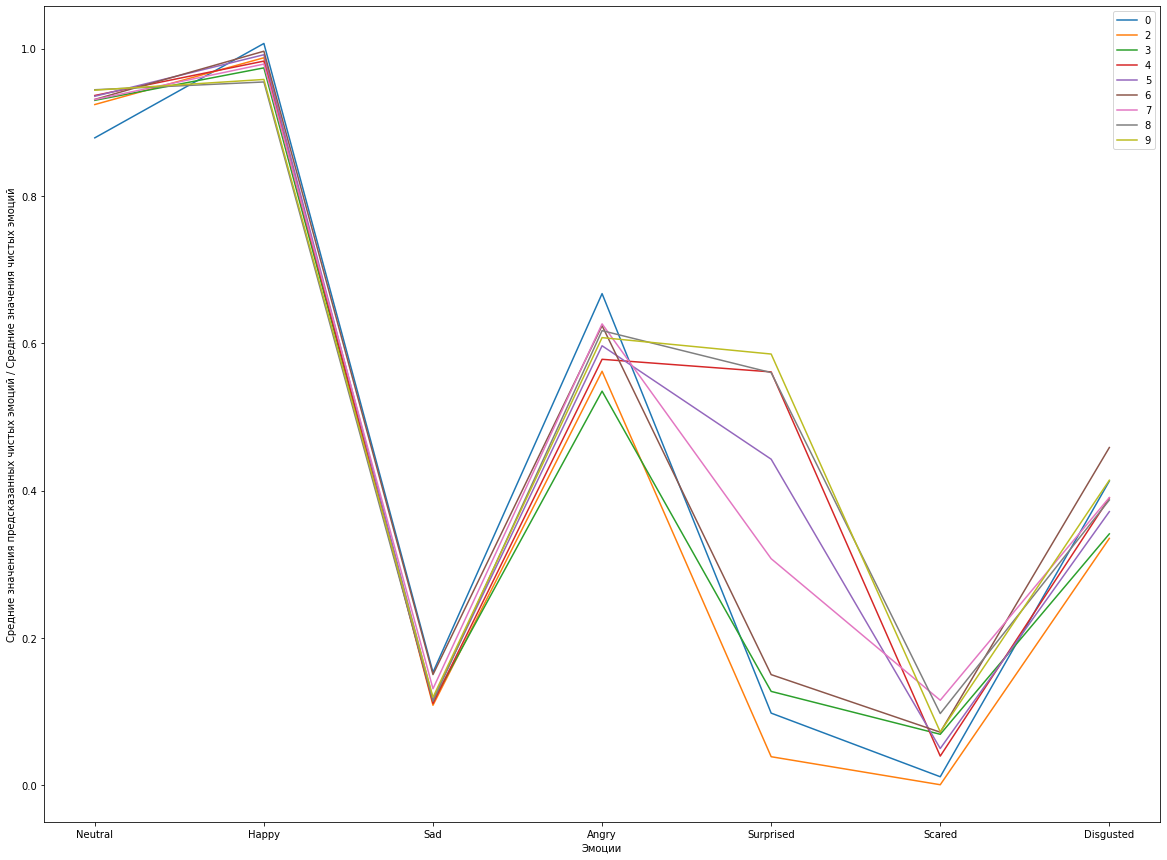

In [47]:
kwargs = {
    'models': models, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics,
    'scale': True
}
df_clear_metrics = tools.plot_emotions(**kwargs)

In [48]:
df_clear_metrics.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2,0.924113,0.987615,0.108744,0.562064,0.038895,0.000857,0.335247,0.422505
2,3,0.929815,0.973881,0.114066,0.535123,0.127559,0.069331,0.341366,0.441591
0,0,0.878922,1.007016,0.153451,0.667472,0.098069,0.011706,0.413054,0.461384
5,6,0.931045,0.996500,0.150393,0.624001,0.150319,0.072157,0.458575,0.483284
6,7,0.930888,0.979021,0.131136,0.626432,0.307655,0.115517,0.390706,0.497336
4,5,0.935337,0.991736,0.117371,0.596690,0.442711,0.050028,0.371550,0.500775
3,4,0.936401,0.983075,0.111273,0.578317,0.561217,0.039727,0.390050,0.514294
7,8,0.944208,0.954743,0.114197,0.617229,0.560242,0.097493,0.387331,0.525063
8,9,0.943615,0.958160,0.119550,0.607741,0.585463,0.072540,0.414182,0.528750


In [33]:
df_clear_metrics[df_clear_metrics.model == '7.10.9']

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
143,7.10.9,0.980029,0.964971,0.166464,0.783942,0.651393,0.11358,0.377155,0.576791


In [49]:
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0,0.878922,1.007016,0.153451,0.667472,0.098069,0.011706,0.413054,0.461384
1,2,0.924113,0.987615,0.108744,0.562064,0.038895,0.000857,0.335247,0.422505
2,3,0.929815,0.973881,0.114066,0.535123,0.127559,0.069331,0.341366,0.441591
3,4,0.936401,0.983075,0.111273,0.578317,0.561217,0.039727,0.390050,0.514294
4,5,0.935337,0.991736,0.117371,0.596690,0.442711,0.050028,0.371550,0.500775
5,6,0.931045,0.996500,0.150393,0.624001,0.150319,0.072157,0.458575,0.483284
6,7,0.930888,0.979021,0.131136,0.626432,0.307655,0.115517,0.390706,0.497336
7,8,0.944208,0.954743,0.114197,0.617229,0.560242,0.097493,0.387331,0.525063
8,9,0.943615,0.958160,0.119550,0.607741,0.585463,0.072540,0.414182,0.528750


In [5]:
name_db = 'df_clear_metrics'
v = 1
layer = 'first'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_1/df_clear_metrics_1.db'

In [3]:
tools.save_to_db(db_path, name_db, df_clear_metrics)

NameError: name 'tools' is not defined

In [9]:
import sqlite3
connection = sqlite3.connect(db_path)
df_clear_metrics = pd.read_sql(f'select * from {name_db}', con=connection)
df_clear_metrics

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0,0.878921769837697,1.00701584639759,0.15345063007388,0.66747184673296,0.0980688107560458,0.0117055679141891,0.413053817619745,0.461384041333158
1,2,0.924113259604571,0.987614554074252,0.108743951362211,0.562063654495649,0.0388950635009213,0.000857410886251897,0.33524713252707,0.422505003778704
2,3,0.929815120953982,0.973880590767926,0.114065905805624,0.535123172969217,0.127558928446442,0.0693307495584675,0.341365589712658,0.44159143688776
3,4,0.936400953617162,0.983074538795843,0.111272935821968,0.578317375138593,0.561217349630996,0.0397272955845384,0.390049501305701,0.5142942785564
4,5,0.935336611031951,0.991735850959175,0.117370870005688,0.596689621514729,0.442711055237357,0.0500279570034906,0.371550214675967,0.500774597204051
5,6,0.931045295608654,0.996500442670884,0.150392517423857,0.624001368341257,0.150319160356382,0.0721574633144865,0.458574860635465,0.483284444050141
6,7,0.930887676059141,0.979020823385479,0.131135517746068,0.626431852405241,0.307654530907605,0.115517110509031,0.390706488685886,0.497336285671207
7,8,0.944207957579813,0.954743368005742,0.114197456373843,0.617229173453297,0.560241763669638,0.0974930384579827,0.387331461135737,0.525063459810865
8,9,0.943614648638708,0.958160305607118,0.119550157745742,0.607741037633622,0.585463102531566,0.0725397730574888,0.41418152009608,0.528750077901475


In [12]:
df_clear_metrics.sort_values('clear')

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2,0.924113259604571,0.987614554074252,0.108743951362211,0.562063654495649,0.0388950635009213,0.000857410886251897,0.33524713252707,0.422505003778704
2,3,0.929815120953982,0.973880590767926,0.114065905805624,0.535123172969217,0.127558928446442,0.0693307495584675,0.341365589712658,0.44159143688776
0,0,0.878921769837697,1.00701584639759,0.15345063007388,0.66747184673296,0.0980688107560458,0.0117055679141891,0.413053817619745,0.461384041333158
5,6,0.931045295608654,0.996500442670884,0.150392517423857,0.624001368341257,0.150319160356382,0.0721574633144865,0.458574860635465,0.483284444050141
6,7,0.930887676059141,0.979020823385479,0.131135517746068,0.626431852405241,0.307654530907605,0.115517110509031,0.390706488685886,0.497336285671207
4,5,0.935336611031951,0.991735850959175,0.117370870005688,0.596689621514729,0.442711055237357,0.0500279570034906,0.371550214675967,0.500774597204051
3,4,0.936400953617162,0.983074538795843,0.111272935821968,0.578317375138593,0.561217349630996,0.0397272955845384,0.390049501305701,0.5142942785564
7,8,0.944207957579813,0.954743368005742,0.114197456373843,0.617229173453297,0.560241763669638,0.0974930384579827,0.387331461135737,0.525063459810865
8,9,0.943614648638708,0.958160305607118,0.119550157745742,0.607741037633622,0.585463102531566,0.0725397730574888,0.41418152009608,0.528750077901475


In [53]:
v = 2
models_2 = tools.load_models('../saved_models', df, layer, v)
models_2

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['0_2', '0', <nn_train.neural_network.NeuralNetwork at 0x7f6a91f79af0>],
 ['2_2', '2', <nn_train.neural_network.NeuralNetwork at 0x7f6ab870a370>],
 ['3_2', '3', <nn_train.neural_network.NeuralNetwork at 0x7f6a91dd6820>],
 ['4_2', '4', <nn_train.neural_network.NeuralNetwork at 0x7f6a91f38490>],
 ['5_2', '5', <nn_train.neural_network.NeuralNetwork at 0x7f6ab836df70>],
 ['6_2', '6', <nn_train.neural_network.NeuralNetwork at 0x7f6ab811eca0>],
 ['7_2', '7', <nn_train.neural_network.NeuralNetwork at 0x7f6ab81ff220>],
 ['8_2', '8', <nn_train.neural_network.NeuralNetwork at 0x7f6a91d7b310>],
 ['9_2', '9', <nn_train.neural_network.NeuralNetwork at 0x7f6ab80c6250>]]

In [54]:
df_metrics_2 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_2

,model,layer,N,mean,norm,stat


In [55]:
layer

'first'

In [56]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [57]:
df_metrics_2 = tools.create_df_metrics(models_2, test, df_metrics_2, layer=layer)
df_metrics_2

,model,layer,N,mean,norm,stat
0,0_2,first,0,0.096398,0.263710,0.485441
1,2_2,first,2,0.083028,0.222784,0.461403
2,3_2,first,3,0.085082,0.226568,0.464967
3,4_2,first,4,0.077502,0.213058,0.474124
4,5_2,first,5,0.081087,0.219581,0.464040
5,6_2,first,6,0.081384,0.219668,0.465280
6,7_2,first,7,0.081797,0.221435,0.465178
7,8_2,first,8,0.071896,0.199914,0.478278
8,9_2,first,9,0.068928,0.193882,0.480796


In [58]:
df_metrics_2.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
8,9_2,first,9,0.068928,0.193882,0.480796
7,8_2,first,8,0.071896,0.199914,0.478278
3,4_2,first,4,0.077502,0.213058,0.474124
4,5_2,first,5,0.081087,0.219581,0.464040
5,6_2,first,6,0.081384,0.219668,0.465280
6,7_2,first,7,0.081797,0.221435,0.465178
1,2_2,first,2,0.083028,0.222784,0.461403
2,3_2,first,3,0.085082,0.226568,0.464967
0,0_2,first,0,0.096398,0.263710,0.485441


In [59]:
df_clear_metrics_2 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [60]:
len(models_2)

9

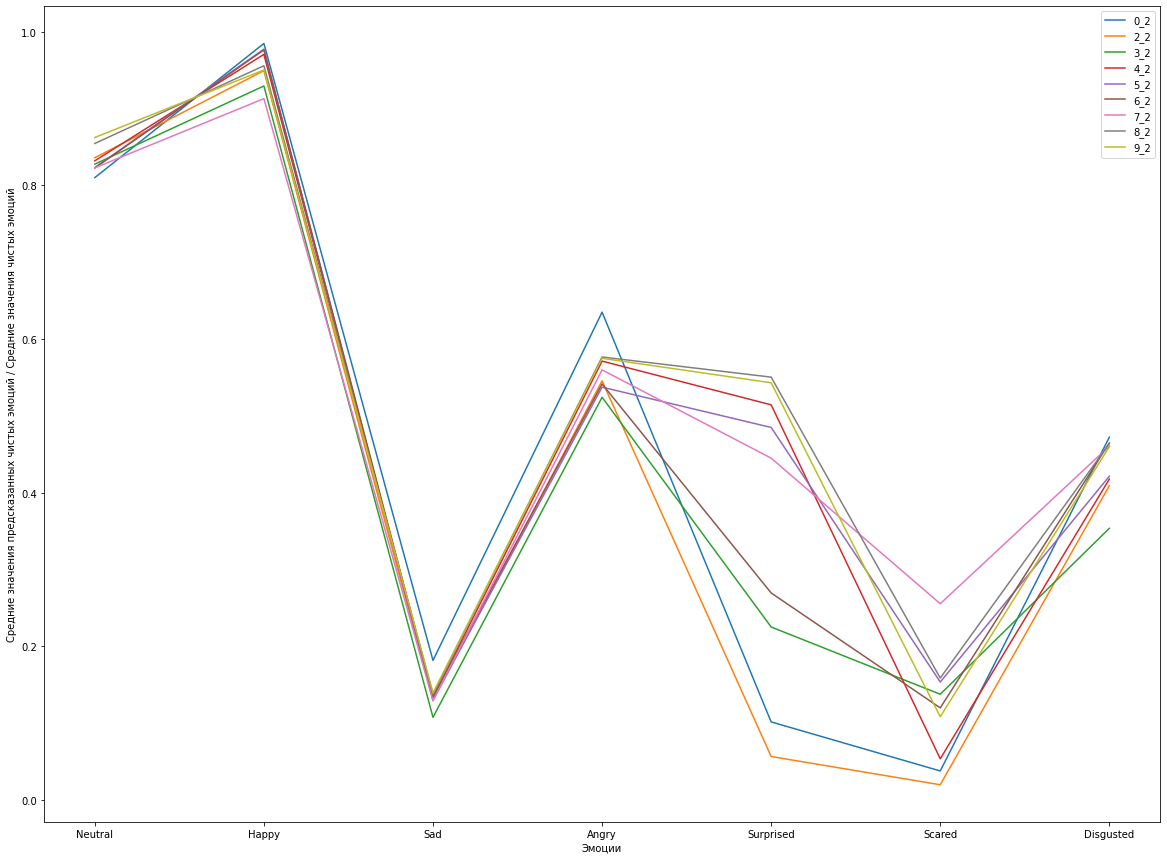

In [61]:
kwargs = {
    'models': models_2, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_2,
    'scale': True
}
df_clear_metrics_2 = tools.plot_emotions(**kwargs)

In [62]:
df_clear_metrics_2.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2_2,0.836113,0.949520,0.129314,0.545680,0.056610,0.019870,0.409219,0.420904
2,3_2,0.827797,0.929571,0.107600,0.524330,0.225234,0.137651,0.353667,0.443693
0,0_2,0.810249,0.984909,0.181697,0.635112,0.101650,0.037817,0.472378,0.460545
5,6_2,0.822853,0.976534,0.134750,0.541614,0.269536,0.119921,0.464927,0.475734
3,4_2,0.832119,0.970714,0.133369,0.571355,0.514438,0.053630,0.417770,0.499056
4,5_2,0.823398,0.977518,0.130642,0.537472,0.485020,0.153596,0.421484,0.504161
6,7_2,0.823001,0.913093,0.129391,0.559961,0.445038,0.255517,0.460713,0.512387
8,9_2,0.862489,0.950373,0.139368,0.575016,0.543168,0.108403,0.459977,0.519828
7,8_2,0.854709,0.955880,0.137697,0.576740,0.550518,0.158739,0.464084,0.528338


In [65]:
metrics = tools.metrics + ['clear']

In [66]:
metric_df_dict = tools.create_metric_df_dict(metrics, df_metrics_2, df_clear_metrics_2)
metric_df_dict

{'mean':   model  layer  N      mean      norm      stat
 0   0_2  first  0  0.096398  0.263710  0.485441
 1   2_2  first  2  0.083028  0.222784  0.461403
 2   3_2  first  3  0.085082  0.226568  0.464967
 3   4_2  first  4  0.077502  0.213058  0.474124
 4   5_2  first  5  0.081087  0.219581  0.464040
 5   6_2  first  6  0.081384  0.219668  0.465280
 6   7_2  first  7  0.081797  0.221435  0.465178
 7   8_2  first  8  0.071896  0.199914  0.478278
 8   9_2  first  9  0.068928  0.193882  0.480796,
 'norm':   model  layer  N      mean      norm      stat
 0   0_2  first  0  0.096398  0.263710  0.485441
 1   2_2  first  2  0.083028  0.222784  0.461403
 2   3_2  first  3  0.085082  0.226568  0.464967
 3   4_2  first  4  0.077502  0.213058  0.474124
 4   5_2  first  5  0.081087  0.219581  0.464040
 5   6_2  first  6  0.081384  0.219668  0.465280
 6   7_2  first  7  0.081797  0.221435  0.465178
 7   8_2  first  8  0.071896  0.199914  0.478278
 8   9_2  first  9  0.068928  0.193882  0.480796,
 '

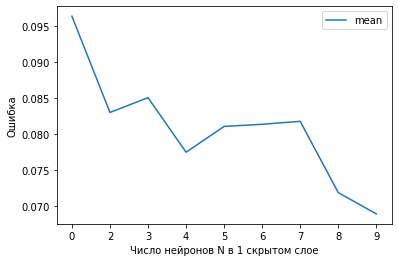

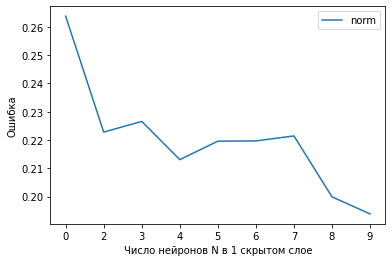

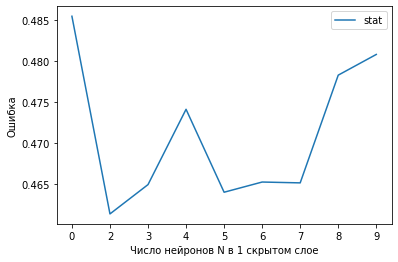

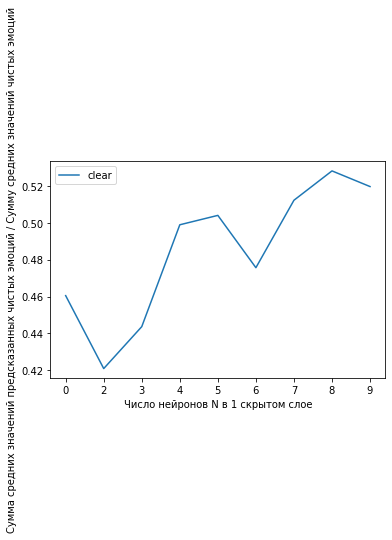

In [67]:
tools.plot_metrics(metric_df_dict)

In [68]:
v

2

In [69]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_2/df_metrics_2.db'

In [70]:
tools.save_to_db(db_path, name_db, df_metrics_2)

In [71]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,0_2,first,0,0.0963977550572083,0.263709776188975,0.485440790653229
1,2_2,first,2,0.0830282476572241,0.222783578656489,0.46140319108963
2,3_2,first,3,0.0850820498284174,0.226567613853601,0.464967489242554
3,4_2,first,4,0.0775016257768115,0.213057998070913,0.47412446141243
4,5_2,first,5,0.0810868801728661,0.219580550755093,0.464040488004684
5,6_2,first,6,0.0813843221782315,0.219667671564667,0.46528035402298
6,7_2,first,7,0.0817969922445796,0.221435443922018,0.465177714824677
7,8_2,first,8,0.0718962770261979,0.199914442325354,0.478277951478958
8,9_2,first,9,0.0689284795282149,0.193881892662934,0.480796068906784


In [72]:
df_clear_metrics_2

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_2,0.810249,0.984909,0.181697,0.635112,0.101650,0.037817,0.472378,0.460545
1,2_2,0.836113,0.949520,0.129314,0.545680,0.056610,0.019870,0.409219,0.420904
2,3_2,0.827797,0.929571,0.107600,0.524330,0.225234,0.137651,0.353667,0.443693
3,4_2,0.832119,0.970714,0.133369,0.571355,0.514438,0.053630,0.417770,0.499056
4,5_2,0.823398,0.977518,0.130642,0.537472,0.485020,0.153596,0.421484,0.504161
5,6_2,0.822853,0.976534,0.134750,0.541614,0.269536,0.119921,0.464927,0.475734
6,7_2,0.823001,0.913093,0.129391,0.559961,0.445038,0.255517,0.460713,0.512387
7,8_2,0.854709,0.955880,0.137697,0.576740,0.550518,0.158739,0.464084,0.528338
8,9_2,0.862489,0.950373,0.139368,0.575016,0.543168,0.108403,0.459977,0.519828


In [73]:
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_2/df_clear_metrics_2.db'

In [74]:
tools.save_to_db(db_path, name_db, df_clear_metrics_2)

In [51]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,6.2.2_2,0.560906169900701,0.182231996113118,0.0534018604955658,0.122960920651012,0.0349353374997471,0.0224343117545633,0.0576288036310636,0.147785628577967
1,6.2.3_2,0.816130545655667,0.982910766138594,0.138786444573319,0.508358745619464,6.74711213469114e-10,6.08494897902596e-05,0.444942737644979,0.413027155685218
2,6.2.4_2,0.831593564880894,0.989780419769053,8.65746795656402e-12,0.136943433777176,2.58899920265428e-09,4.73104326956405e-08,3.22192944320524e-10,0.279759638379629
3,6.2.5_2,0.81031869737244,0.927202906985004,0.150169602192336,0.602514190184194,0.0740146397757315,0.0356277597008967,0.434756216838785,0.433514859007055
4,6.2.8_2,0.558998492767091,0.182853752196083,0.0540114142201404,0.125292544465082,0.0356859770228748,0.0227247967439539,0.0580836464267329,0.148235803405994
...,...,...,...,...,...,...,...,...,...
108,9.9.8_2,0.815096072309673,0.951985105393153,0.12177491291956,0.557729594209509,0.703168834887751,0.0285270605601516,0.379577822928881,0.508265629029811
109,9.10.6_2,0.809279965682768,0.985051736825409,0.129579458674992,0.538256527245254,0.711930469144459,0.0478755646184379,0.436662167031027,0.522662269888907
110,9.10.7_2,0.829738752042354,0.960506562354553,0.127126986128404,0.542342036858184,0.659064110821531,0.303268315745335,0.459347918583032,0.554484954647627
111,9.10.8_2,0.87766744429103,0.962874651111609,0.127345735647032,0.583329456689895,0.646785222630769,0.0301819422519675,0.377934002652531,0.515159779324976


In [75]:
v = 3
models_3 = tools.load_models('../saved_models', df, layer, v)
models_3

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['0_3', '0', <nn_train.neural_network.NeuralNetwork at 0x7f6a917b84f0>],
 ['2_3', '2', <nn_train.neural_network.NeuralNetwork at 0x7f6a912f6430>],
 ['3_3', '3', <nn_train.neural_network.NeuralNetwork at 0x7f6a911367c0>],
 ['4_3', '4', <nn_train.neural_network.NeuralNetwork at 0x7f6a915c31c0>],
 ['5_3', '5', <nn_train.neural_network.NeuralNetwork at 0x7f6a914aa370>],
 ['6_3', '6', <nn_train.neural_network.NeuralNetwork at 0x7f6a91349b80>],
 ['7_3', '7', <nn_train.neural_network.NeuralNetwork at 0x7f6a917778b0>],
 ['8_3', '8', <nn_train.neural_network.NeuralNetwork at 0x7f6a917f3700>],
 ['9_3', '9', <nn_train.neural_network.NeuralNetwork at 0x7f6a911d7f70>]]

In [76]:
df_metrics_3 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_3

,model,layer,N,mean,norm,stat


In [77]:
test = nn.get_test()
test

,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,Valence,Arousal
Index_,,,,,,,,,
00:00:00.000_Керов Андрей_3,0.987859,0.003336,0.008397,0.001824,0.007601,0.000069,0.000141,-0.005061,0.247500
00:00:00.030_Керов Андрей_3,0.987882,0.003385,0.008362,0.001783,0.007645,0.000081,0.000139,-0.004977,0.247500
00:00:00.060_Керов Андрей_3,0.987905,0.003434,0.008327,0.001741,0.007689,0.000092,0.000136,-0.004893,0.247500
00:00:00.090_Керов Андрей_3,0.987929,0.003483,0.008292,0.001700,0.007733,0.000103,0.000134,-0.004809,0.247500
00:00:00.121_Керов Андрей_3,0.988026,0.003506,0.008184,0.001645,0.007784,0.000113,0.000130,-0.004678,0.247500
...,...,...,...,...,...,...,...,...,...
00:01:51.700_Куликов Алексей_1,0.931563,0.000038,0.023971,0.067963,0.026351,0.000250,0.000692,-0.067925,0.287489
00:01:51.800_Куликов Алексей_1,0.935643,0.000032,0.023777,0.062597,0.023741,0.000229,0.000799,-0.062565,0.287139
00:01:51.900_Куликов Алексей_1,0.938411,0.000027,0.023437,0.059357,0.021180,0.000213,0.000849,-0.059330,0.286695


In [78]:
df_metrics_3 = tools.create_df_metrics(models_3, test, df_metrics_3, layer=layer)
df_metrics_3

,model,layer,N,mean,norm,stat
0,0_3,first,0,0.082888,0.226499,0.505607
1,2_3,first,2,0.063172,0.174779,0.478858
2,3_3,first,3,0.059466,0.163737,0.509206
3,4_3,first,4,0.056434,0.158508,0.502838
4,5_3,first,5,0.059345,0.163378,0.513273
5,6_3,first,6,0.056032,0.156082,0.520813
6,7_3,first,7,0.057253,0.159472,0.522542
7,8_3,first,8,0.053823,0.151317,0.516099
8,9_3,first,9,0.054018,0.151935,0.514208


In [79]:
df_metrics_3.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
7,8_3,first,8,0.053823,0.151317,0.516099
8,9_3,first,9,0.054018,0.151935,0.514208
5,6_3,first,6,0.056032,0.156082,0.520813
3,4_3,first,4,0.056434,0.158508,0.502838
6,7_3,first,7,0.057253,0.159472,0.522542
4,5_3,first,5,0.059345,0.163378,0.513273
2,3_3,first,3,0.059466,0.163737,0.509206
1,2_3,first,2,0.063172,0.174779,0.478858
0,0_3,first,0,0.082888,0.226499,0.505607


In [80]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_3/df_metrics_3.db'

In [81]:
tools.save_to_db(db_path, name_db, df_metrics_3)

In [82]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,0_3,first,0,0.0828880169692576,0.226498525172318,0.505606710910797
1,2_3,first,2,0.0631724703908952,0.17477861212315,0.478857964277267
2,3_3,first,3,0.0594657455415324,0.163736980953464,0.509206414222717
3,4_3,first,4,0.0564337996112064,0.158507631529909,0.502838373184204
4,5_3,first,5,0.0593452557994635,0.163378035171251,0.513273417949677
5,6_3,first,6,0.0560317961569871,0.156081789506143,0.520813167095184
6,7_3,first,7,0.057252660438188,0.159471824943959,0.522541999816895
7,8_3,first,8,0.0538232179176516,0.151317402455061,0.51609867811203
8,9_3,first,9,0.054017696262137,0.151935006252435,0.514208257198334


In [83]:
df_clear_metrics_3 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_3

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [84]:
len(models_3)

9

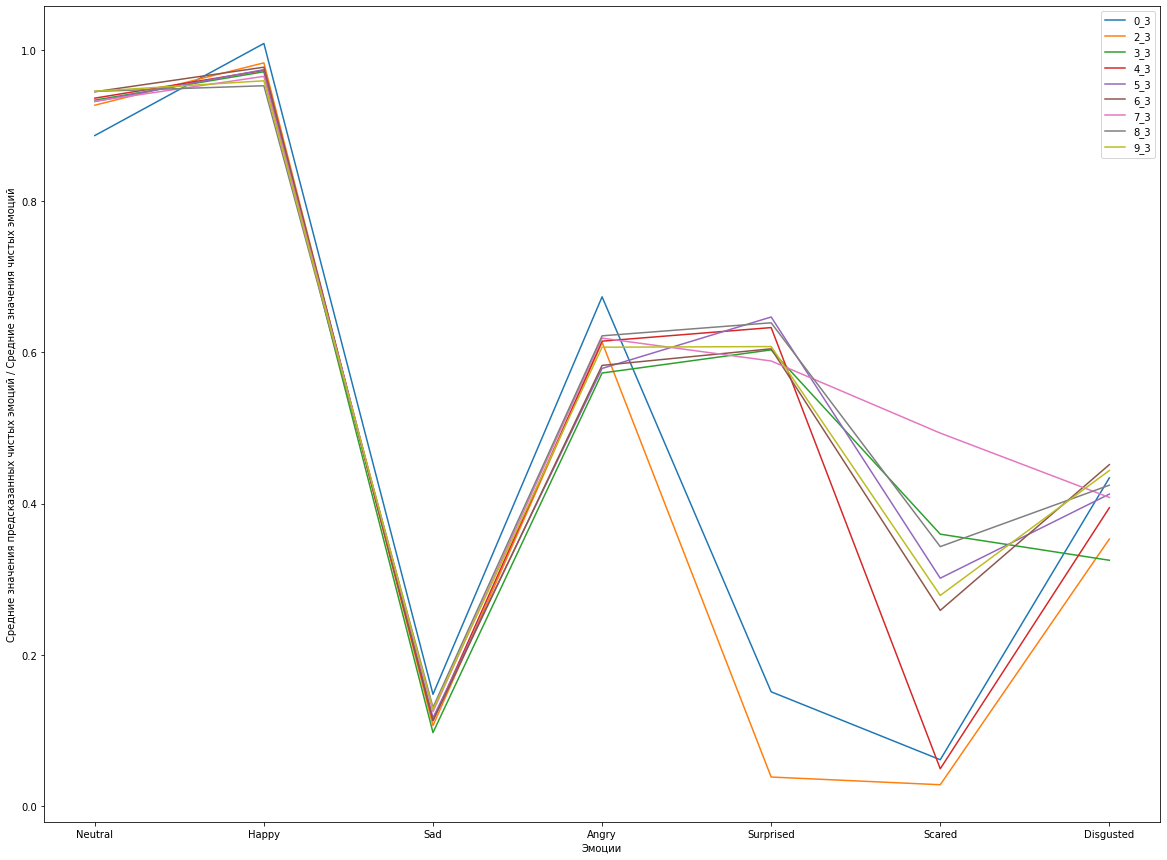

In [85]:
kwargs = {
    'models': models_3, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_3,
    'scale': True
}
df_clear_metrics_3 = tools.plot_emotions(**kwargs)

In [86]:
df_clear_metrics_3.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2_3,0.926843,0.982819,0.106563,0.613434,0.038465,0.028279,0.353210,0.435659
0,0_3,0.886704,1.008477,0.147877,0.673464,0.151166,0.061340,0.434057,0.480441
3,4_3,0.936147,0.972993,0.113071,0.614823,0.632780,0.049403,0.394517,0.530533
2,3_3,0.933577,0.971040,0.097212,0.572703,0.603311,0.359612,0.325112,0.551795
5,6_3,0.944602,0.977104,0.113082,0.582762,0.604730,0.258809,0.451554,0.561806
4,5_3,0.931697,0.973871,0.116798,0.578751,0.646773,0.301389,0.412587,0.565981
8,9_3,0.945330,0.959115,0.127861,0.606813,0.607690,0.278603,0.443780,0.567027
7,8_3,0.945071,0.952561,0.130612,0.621892,0.639115,0.343147,0.424382,0.579540
6,7_3,0.932046,0.964984,0.124897,0.618837,0.588619,0.493256,0.408165,0.590115


In [87]:
v = 3
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_3/df_clear_metrics_3.db'

In [88]:
tools.save_to_db(db_path, name_db, df_clear_metrics_3)

In [89]:
df_clear_metrics_3

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_3,0.886704,1.008477,0.147877,0.673464,0.151166,0.061340,0.434057,0.480441
1,2_3,0.926843,0.982819,0.106563,0.613434,0.038465,0.028279,0.353210,0.435659
2,3_3,0.933577,0.971040,0.097212,0.572703,0.603311,0.359612,0.325112,0.551795
3,4_3,0.936147,0.972993,0.113071,0.614823,0.632780,0.049403,0.394517,0.530533
4,5_3,0.931697,0.973871,0.116798,0.578751,0.646773,0.301389,0.412587,0.565981
5,6_3,0.944602,0.977104,0.113082,0.582762,0.604730,0.258809,0.451554,0.561806
6,7_3,0.932046,0.964984,0.124897,0.618837,0.588619,0.493256,0.408165,0.590115
7,8_3,0.945071,0.952561,0.130612,0.621892,0.639115,0.343147,0.424382,0.579540
8,9_3,0.945330,0.959115,0.127861,0.606813,0.607690,0.278603,0.443780,0.567027


In [90]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_3,0.886703832073099,1.00847709212813,0.147877071530997,0.673464298804694,0.151166460678095,0.0613399945637759,0.434056747941702,0.480440785388642
1,2_3,0.926843344569085,0.982818745847294,0.106563382500136,0.613434078256614,0.0384646138439086,0.0282790877071081,0.353209573359882,0.435658975154861
2,3_3,0.933576820090879,0.971040148560912,0.0972124894050713,0.572702798431646,0.603310820789616,0.359611505386876,0.325111794645769,0.551795196758681
3,4_3,0.936146669666191,0.972992972943915,0.11307142450579,0.61482323231469,0.632779705101952,0.0494028423346725,0.394516524482942,0.530533338764307
4,5_3,0.931696883024647,0.973871010751764,0.116797968768847,0.578751497257549,0.646773169155002,0.301389483844533,0.412586676316167,0.565980955588358
5,6_3,0.944602097703817,0.97710390777054,0.113082367767434,0.582761970395385,0.604729527313731,0.258809181989408,0.451553756676078,0.561806115659485
6,7_3,0.932045763038718,0.964983623241038,0.124897131262415,0.618836888076266,0.588619062849181,0.493256367889105,0.408164962613421,0.590114828424306
7,8_3,0.945071488843935,0.952561470447159,0.130611687615254,0.621891778436258,0.639114987112898,0.343147066293978,0.424381683466954,0.579540023173777
8,9_3,0.945329666137695,0.959114657693375,0.127860845882806,0.6068133028135,0.607689649715782,0.278602978762458,0.443779608007517,0.567027244144733


In [91]:
v = 4
models_4 = tools.load_models('../saved_models', df, layer, v)
models_4

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['0_4', '0', <nn_train.neural_network.NeuralNetwork at 0x7f6a90cf8940>],
 ['2_4', '2', <nn_train.neural_network.NeuralNetwork at 0x7f6a91814fd0>],
 ['3_4', '3', <nn_train.neural_network.NeuralNetwork at 0x7f6a90a5a2b0>],
 ['4_4', '4', <nn_train.neural_network.NeuralNetwork at 0x7f6ab8479490>],
 ['5_4', '5', <nn_train.neural_network.NeuralNetwork at 0x7f6a90b714f0>],
 ['6_4', '6', <nn_train.neural_network.NeuralNetwork at 0x7f6a90c77d30>],
 ['7_4', '7', <nn_train.neural_network.NeuralNetwork at 0x7f6a90f402e0>],
 ['8_4', '8', <nn_train.neural_network.NeuralNetwork at 0x7f6a90d3d9d0>],
 ['9_4', '9', <nn_train.neural_network.NeuralNetwork at 0x7f6a90e9ed00>]]

In [92]:
df_metrics_4 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_4

,model,layer,N,mean,norm,stat


In [93]:
df_metrics_4 = tools.create_df_metrics(models_4, test, df_metrics_4, layer=layer)
df_metrics_4

,model,layer,N,mean,norm,stat
0,0_4,first,0,0.094614,0.259578,0.492493
1,2_4,first,2,0.083476,0.225573,0.465855
2,3_4,first,3,0.078694,0.214279,0.481392
3,4_4,first,4,0.076156,0.211292,0.484052
4,5_4,first,5,0.076783,0.214425,0.486832
5,6_4,first,6,0.073650,0.207223,0.489517
6,7_4,first,7,0.076871,0.213834,0.497891
7,8_4,first,8,0.066942,0.188958,0.494618
8,9_4,first,9,0.067292,0.191321,0.492724


In [94]:
df_metrics_4.sort_values('mean')[:15]

,model,layer,N,mean,norm,stat
7,8_4,first,8,0.066942,0.188958,0.494618
8,9_4,first,9,0.067292,0.191321,0.492724
5,6_4,first,6,0.073650,0.207223,0.489517
3,4_4,first,4,0.076156,0.211292,0.484052
4,5_4,first,5,0.076783,0.214425,0.486832
6,7_4,first,7,0.076871,0.213834,0.497891
2,3_4,first,3,0.078694,0.214279,0.481392
1,2_4,first,2,0.083476,0.225573,0.465855
0,0_4,first,0,0.094614,0.259578,0.492493


In [95]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_4/df_metrics_4.db'

In [96]:
tools.save_to_db(db_path, name_db, df_metrics_4)

In [97]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,0_4,first,0,0.0946142269862113,0.259578351335405,0.49249267578125
1,2_4,first,2,0.0834755291168539,0.225572608510326,0.465855449438095
2,3_4,first,3,0.078694473672333,0.21427871561705,0.481392323970795
3,4_4,first,4,0.076156426043177,0.211292064643218,0.484051674604416
4,5_4,first,5,0.076783056448064,0.214424668451657,0.486831575632095
5,6_4,first,6,0.0736502956062021,0.207223040108897,0.489517480134964
6,7_4,first,7,0.0768706152290307,0.213834302958545,0.497891336679459
7,8_4,first,8,0.066942081971063,0.188958206902195,0.49461755156517
8,9_4,first,9,0.067291865306606,0.19132138441386,0.492723882198334


In [98]:
df_clear_metrics_4 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_4

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


In [99]:
len(models_4)

9

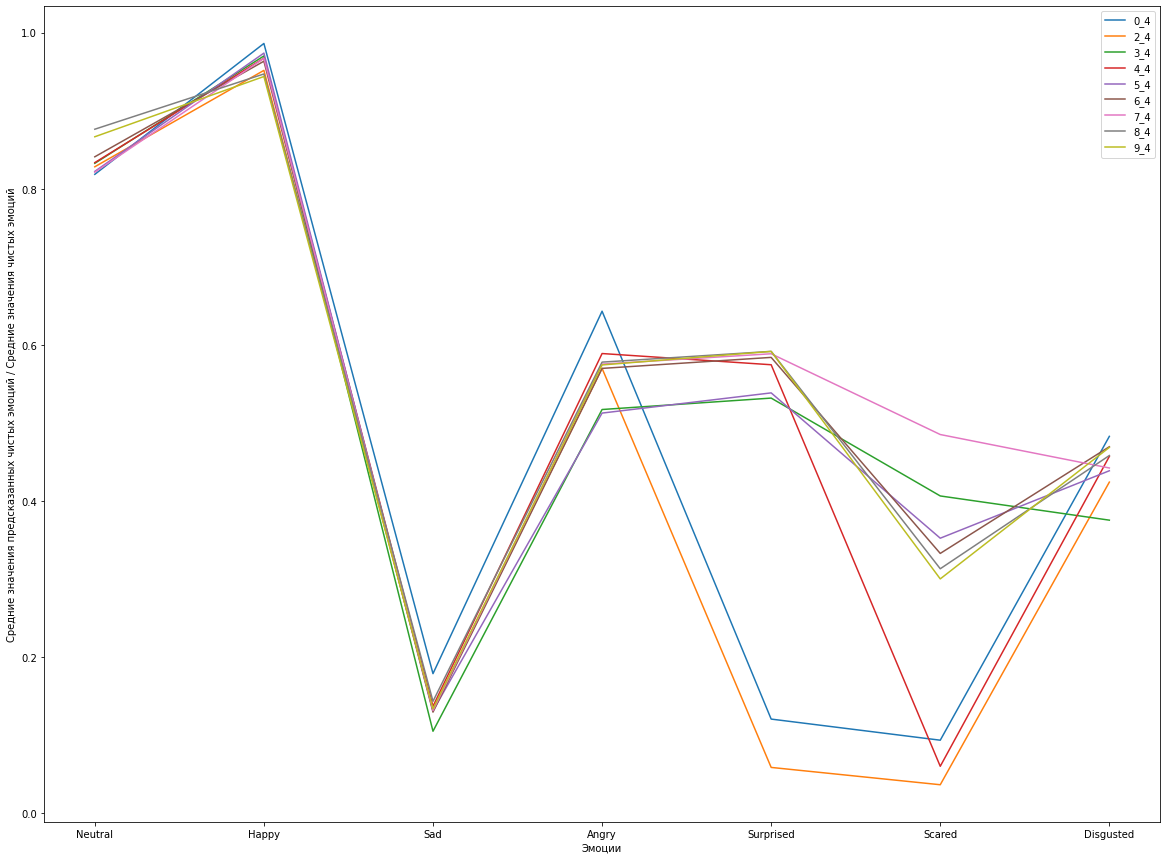

In [100]:
kwargs = {
    'models': models_4, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_4,
    'scale': True
}
df_clear_metrics_4 = tools.plot_emotions(**kwargs)

In [101]:
df_clear_metrics_4.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2_4,0.828096,0.951535,0.132910,0.569980,0.058954,0.036779,0.424297,0.428936
0,0_4,0.818420,0.986009,0.179035,0.643151,0.120850,0.093810,0.482891,0.474881
3,4_4,0.833437,0.967130,0.137226,0.588942,0.574600,0.060396,0.457229,0.516994
2,3_4,0.832530,0.970015,0.105276,0.517268,0.531892,0.406578,0.375581,0.534163
4,5_4,0.822216,0.973666,0.131447,0.512695,0.538564,0.352483,0.438844,0.538559
8,9_4,0.866540,0.943689,0.133909,0.574338,0.591669,0.300372,0.468754,0.554182
5,6_4,0.840888,0.963285,0.129784,0.569917,0.584012,0.332995,0.469619,0.555786
7,8_4,0.876200,0.946952,0.143636,0.577957,0.591717,0.313352,0.458346,0.558308
6,7_4,0.821167,0.966981,0.131832,0.575415,0.588646,0.485237,0.442394,0.573096


In [102]:
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_4/df_clear_metrics_4.db'

In [103]:
tools.save_to_db(db_path, name_db, df_clear_metrics_4)

In [104]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
0,0_4,0.818419587882253,0.986009347420565,0.179034521103661,0.6431506645443,0.12085012071575,0.0938102822093403,0.482890883128511,0.474880772429197
1,2_4,0.828096430553274,0.951535300824774,0.13291011970319,0.56997975780082,0.0589536897750096,0.0367787100520789,0.424296937968361,0.428935849525358
2,3_4,0.83252960965448,0.970015217171908,0.105275706094343,0.517268225359388,0.531892175058096,0.406577540378945,0.375580644706989,0.53416273120345
3,4_4,0.833437062691951,0.967129546861379,0.137225913973127,0.588942074859156,0.574599627905044,0.0603962287891145,0.457229436500478,0.51699427022575
4,5_4,0.822216327104259,0.973665985371856,0.131447078356085,0.512695131669106,0.538564084552078,0.35248270221785,0.438844293697783,0.538559371852717
5,6_4,0.840888312457167,0.963284832211779,0.129784355545195,0.569917268207777,0.58401239837848,0.332994817518721,0.469618780893877,0.555785823601856
6,7_4,0.821167436223245,0.966981154366132,0.131832390267951,0.575415250718107,0.588645779316089,0.485236942768097,0.44239400201346,0.573096136524726
7,8_4,0.876200140727055,0.9469516866973,0.143635764174907,0.577956575774256,0.591716743990147,0.313351668563544,0.458345889299331,0.558308352746649
8,9_4,0.866539966429854,0.943689202417723,0.133908667532276,0.574337871377916,0.59166877861235,0.300372464984071,0.468753767709663,0.554181531294836


In [105]:
v = 5
models_5 = tools.load_models('../saved_models', df, layer, v)
models_5

/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_x[field] = self.df_x[field].apply(lambda entry: float(entry))
/home/ivan/Рабочий стол/Учёба/Git/NIR_1_sem_magistracy/Test/../nn_train/neural_network.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.df_y[field] = self.df_y[field].apply(lambda entry: float(entry))


[['0_5', '0', <nn_train.neural_network.NeuralNetwork at 0x7f6ab8654c40>],
 ['2_5', '2', <nn_train.neural_network.NeuralNetwork at 0x7f6a90748070>],
 ['3_5', '3', <nn_train.neural_network.NeuralNetwork at 0x7f6ab8666e80>],
 ['4_5', '4', <nn_train.neural_network.NeuralNetwork at 0x7f6a9186d7c0>],
 ['5_5', '5', <nn_train.neural_network.NeuralNetwork at 0x7f6ab8477fd0>],
 ['6_5', '6', <nn_train.neural_network.NeuralNetwork at 0x7f6a90433340>],
 ['7_5', '7', <nn_train.neural_network.NeuralNetwork at 0x7f6a90705340>],
 ['8_5', '8', <nn_train.neural_network.NeuralNetwork at 0x7f6a9067d7f0>],
 ['9_5', '9', <nn_train.neural_network.NeuralNetwork at 0x7f6a908998e0>]]

In [107]:
len(models_5)

9

In [108]:
df_metrics_5 = pd.DataFrame(columns = ['model', 'layer', 'N'] + tools.metrics)
df_metrics_5

,model,layer,N,mean,norm,stat


In [109]:
df_metrics_5 = tools.create_df_metrics(models_5, test, df_metrics_5, layer=layer)
df_metrics_5

,model,layer,N,mean,norm,stat
0,0_5,first,0,0.082484,0.226055,0.510195
1,2_5,first,2,0.063234,0.175214,0.480043
2,3_5,first,3,0.059553,0.163531,0.520192
3,4_5,first,4,0.056381,0.158886,0.504277
4,5_5,first,5,0.058032,0.160727,0.533746
5,6_5,first,6,0.055141,0.153872,0.535042
6,7_5,first,7,0.057033,0.159337,0.531546
7,8_5,first,8,0.053418,0.150329,0.524923
8,9_5,first,9,0.053827,0.150966,0.524741


In [110]:
df_metrics_5.sort_values('mean')

,model,layer,N,mean,norm,stat
7,8_5,first,8,0.053418,0.150329,0.524923
8,9_5,first,9,0.053827,0.150966,0.524741
5,6_5,first,6,0.055141,0.153872,0.535042
3,4_5,first,4,0.056381,0.158886,0.504277
6,7_5,first,7,0.057033,0.159337,0.531546
4,5_5,first,5,0.058032,0.160727,0.533746
2,3_5,first,3,0.059553,0.163531,0.520192
1,2_5,first,2,0.063234,0.175214,0.480043
0,0_5,first,0,0.082484,0.226055,0.510195


In [111]:
name_db = 'df_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_5/df_metrics_5.db'

In [112]:
tools.save_to_db(db_path, name_db, df_metrics_5)

In [113]:
connection = sqlite3.connect(db_path)
pd.read_sql(f'select * from {name_db}', con=connection)

,model,layer,N,mean,norm,stat
0,0_5,first,0,0.0824840796406286,0.226055003244427,0.510195314884186
1,2_5,first,2,0.0632338860548416,0.175214130266195,0.480042725801468
2,3_5,first,3,0.0595532271879073,0.163531404533873,0.520192444324493
3,4_5,first,4,0.0563807034639514,0.158885826623571,0.50427657365799
4,5_5,first,5,0.0580324360655611,0.160727148648087,0.53374582529068
5,6_5,first,6,0.0551414866595062,0.153871560958792,0.535041987895966
6,7_5,first,7,0.0570328764379651,0.159337212792648,0.531545519828796
7,8_5,first,8,0.0534179307336655,0.150328635379937,0.524922609329224
8,9_5,first,9,0.0538268707915367,0.15096578895843,0.52474057674408


In [114]:
df_clear_metrics_5 = pd.DataFrame(columns = ['model'] + list(seven_fields) + ['clear'])
df_clear_metrics_5

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear


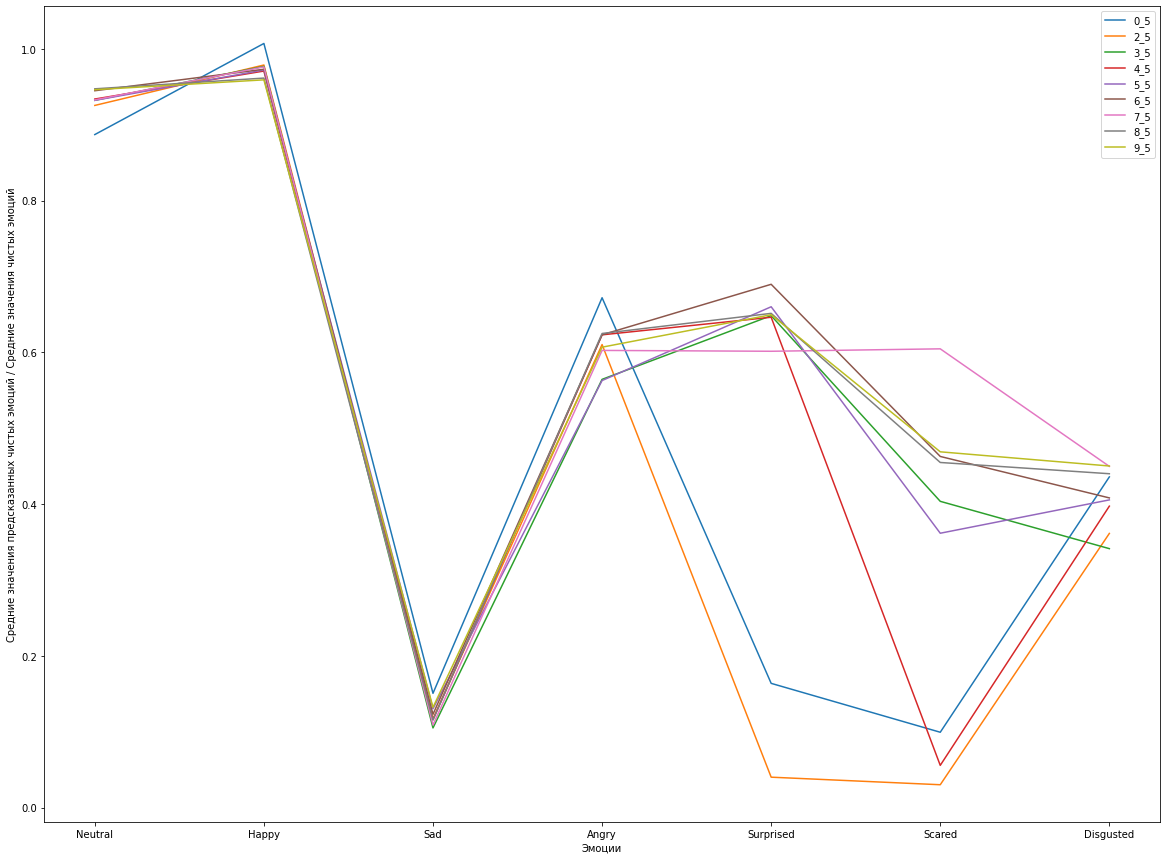

In [115]:
kwargs = {
    'models': models_5, 
    'df_clear': df_clear, 
    'df_clear_metrics': df_clear_metrics_5,
    'scale': True
}
df_clear_metrics_5 = tools.plot_emotions(**kwargs)

In [116]:
df_clear_metrics_5.sort_values('clear')[-15:]

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2_5,0.925331,0.978591,0.117001,0.610225,0.040166,0.030211,0.361352,0.437554
0,0_5,0.886934,1.006987,0.150666,0.671938,0.163799,0.099373,0.435850,0.487935
3,4_5,0.933762,0.970644,0.115981,0.623048,0.646227,0.055749,0.397298,0.534673
2,3_5,0.932106,0.976792,0.105079,0.564381,0.648300,0.403654,0.341313,0.567375
4,5_5,0.932022,0.972029,0.130341,0.562818,0.660030,0.361623,0.405551,0.574916
7,8_5,0.947217,0.961370,0.115475,0.624835,0.651345,0.454853,0.440024,0.599303
8,9_5,0.946048,0.959038,0.132195,0.606783,0.649554,0.468903,0.450213,0.601819
5,6_5,0.944704,0.972995,0.123069,0.623086,0.689638,0.462795,0.408159,0.603492
6,7_5,0.932652,0.976128,0.108907,0.602512,0.601398,0.604597,0.449717,0.610844


In [14]:
v = 5
name_db = 'df_clear_metrics'
db_path = f'../model_metrics/{layer}/_{v}/{name_db}_{v}.db'
db_path

'../model_metrics/first/_5/df_clear_metrics_5.db'

In [118]:
tools.save_to_db(db_path, name_db, df_clear_metrics_5)

In [15]:
connection = sqlite3.connect(db_path)
df_clear_metrics_5 = pd.read_sql(f'select * from {name_db}', con=connection)

In [17]:
df_clear_metrics_5.sort_values('clear')

,model,Neutral,Happy,Sad,Angry,Surprised,Scared,Disgusted,clear
1,2_5,0.925330720061695,0.97859128674245,0.117000898496852,0.610225197871063,0.0401656411955802,0.0302111109097799,0.361352226657092,0.437553868847787
0,0_5,0.886934025965556,1.00698743219999,0.150665834475244,0.67193780229139,0.163799373121043,0.0993727249842064,0.435849766288734,0.487935279903738
3,4_5,0.93376217970777,0.970643848708649,0.115981455980881,0.623047621692493,0.646227283391628,0.0557492578438684,0.397298333542936,0.534672854409747
2,3_5,0.932105501517152,0.976792133639111,0.105078925752035,0.564381461438387,0.648299735647842,0.403653552719191,0.341313039423651,0.567374907162481
4,5_5,0.932022037981091,0.972028714990605,0.130341073318064,0.562818364752076,0.660030377085131,0.361623337455824,0.405550904269015,0.574916401407401
7,8_5,0.947216903221658,0.961369611021468,0.11547548717062,0.624834848535242,0.65134485369345,0.454852861516616,0.440023800628153,0.599302623683887
8,9_5,0.946048474550296,0.959038343414967,0.132195212289384,0.606782639457854,0.649553607784269,0.468902757354811,0.450212683245089,0.601819102585239
5,6_5,0.9447035071168,0.972995123559788,0.123068780037567,0.623086241607488,0.68963806276275,0.462795326522752,0.408159493156966,0.603492362109159
6,7_5,0.932652455345663,0.976128049525551,0.108906719981207,0.6025120480336,0.601398356678256,0.604596967790641,0.449716547607008,0.610844449280275
